make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object


/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

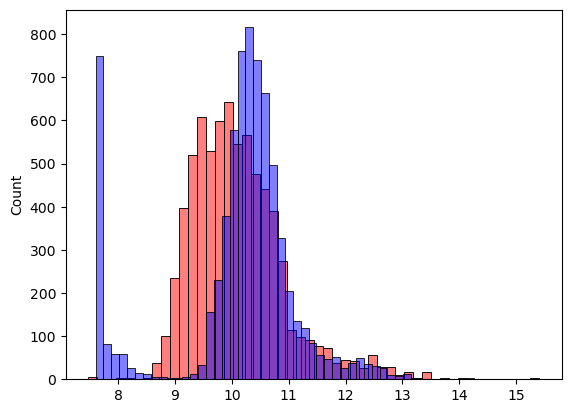

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading dataset
df_arq1 = pd.read_csv("/home/marcus-vinicius/Desktop/Python/Machine_Leaning_Zoomcamp/car_price_data.csv")
df_arq1.columns = df_arq1.columns.str.lower().str.replace(' ', '_')

# Create a list that contains only the col with objects dtypes
strings = list(df_arq1.dtypes[df_arq1.dtypes == 'object'].index)
for col in strings:
    df_arq1[col] = df_arq1[col].str.lower().str.replace(' ', '_')

# Here we divided the Df into the train, test and validation values
n = len(df_arq1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
# As you can see the Df are in order, for better accurancy the data should be random, we need to shuffle them 
df_train = df_arq1.iloc[n_train:]
df_val = df_arq1.iloc[n_train: n_val + n_test]
df_test = df_arq1.iloc[n_test + n_val:]
# Shuffle the index of the Df then updating to a new df
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df_arq1.iloc[idx[:n_train]]
df_val = df_arq1.iloc[idx[n_train : n_train + n_test]]
df_test = df_arq1.iloc[idx[n_train + n_val: ]]
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

# Here we get our target values
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

# Deletting 'msrp' col so we dont have 100% model
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

# Vector dot product
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j]*w[j]
    
    return res  

# Normal equation
def train_linear_regression(X, y):
    # New col of X
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # Matrix operations
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    # Normal equation
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

# Looking for my base line features
print(df_train.dtypes)
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

# we have some 'nan' values in the training df. finding those values and the replace them with 0
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
# our model training prediction
y_pred = w0 + X_train.dot(w)

# Comparing results and true values and You see from this plot that the model is not ideal
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

In [11]:
# Root mean squared error
def rmse(y, y_pred):
    sq = (y - y_pred)**2
    mse = sq.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

0.7554192603920132

In [12]:
# Validation prediction
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301591